# Sorting Algorithm Benchmark Analysis

**Author:** Computer Science Student

## Introduction

This project implements and benchmarks insertion sort and selection sort algorithms to analyze their runtime performance. We test both algorithms under best, average, and worst case scenarios and compare the results with theoretical time complexity predictions.

In [1]:
import time
import random
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Algorithm Implementations

### Insertion Sort

In [2]:
def insertion_sort(lst):
    """Sorts a list in-place using insertion sort algorithm."""
    for i in range(1, len(lst)):
        key = lst[i]
        j = i - 1
        
        while j >= 0 and lst[j] > key:
            lst[j + 1] = lst[j]
            j -= 1
        
        lst[j + 1] = key

In [3]:
def selection_sort(lst):
    """Sorts a list in-place using selection sort algorithm."""
    for i in range(len(lst)):
        min_idx = i
        for j in range(i + 1, len(lst)):
            if lst[j] < lst[min_idx]:
                min_idx = j
        
        lst[i], lst[min_idx] = lst[min_idx], lst[i]

In [4]:
# Test insertion sort
test_list = [64, 34, 25, 12, 22, 11, 90]
insertion_sort(test_list)
print(f"Insertion sort test: {test_list}")

# Test edge cases
test_cases = [[], [42], [1, 2, 3, 4, 5]]
for case in test_cases:
    insertion_sort(case)
    print(f"Edge case result: {case}")

Insertion sort test: [11, 12, 22, 25, 34, 64, 90]
Edge case result: []
Edge case result: [42]
Edge case result: [1, 2, 3, 4, 5]


### Selection sort

In [5]:
# Test selection sort
test_list2 = [64, 34, 25, 12, 22, 11, 90]
selection_sort(test_list2)
print(f"Selection sort test: {test_list2}")

# Test edge cases
test_cases2 = [[], [42], [1, 2, 3, 4, 5]]
for case in test_cases2:
    selection_sort(case)
    print(f"Edge case result: {case}")

Selection sort test: [11, 12, 22, 25, 34, 64, 90]
Edge case result: []
Edge case result: [42]
Edge case result: [1, 2, 3, 4, 5]


## Benchmarking System

In [6]:
def benchmark(sort_func, input_list):
    """Measures runtime of sorting function on given input."""
    # Create copy to avoid modifying original list
    test_list = input_list.copy()
    
    # Measure elapsed time with high precision
    start_time = time.perf_counter()
    sort_func(test_list)
    end_time = time.perf_counter()
    
    return end_time - start_time

In [7]:
def generate_test_data(size, case_type):
    """Generates test data for different scenarios."""
    if case_type == 'best':
        # Best case: already sorted list
        return list(range(size))
    elif case_type == 'average':
        # Average case: randomly shuffled list
        data = list(range(size))
        random.shuffle(data)
        return data
    elif case_type == 'worst':
        # Worst case: reverse sorted list
        return list(range(size, 0, -1))
    else:
        raise ValueError(f"Unknown case_type: {case_type}")

## Benchmark Execution

In [8]:
# Define list sizes spanning multiple orders of magnitude
list_sizes = [1000, 2000, 5000, 10000, 20000]

# Initialize results structure
benchmark_results = {
    'insertion_sort': {
        'best': {'sizes': [], 'times': []},
        'average': {'sizes': [], 'times': []},
        'worst': {'sizes': [], 'times': []}
    },
    'selection_sort': {
        'best': {'sizes': [], 'times': []},
        'average': {'sizes': [], 'times': []},
        'worst': {'sizes': [], 'times': []}
    }
}

print("Running benchmarks...")
print(f"List sizes: {list_sizes}")

Running benchmarks...
List sizes: [1000, 2000, 5000, 10000, 20000]


In [9]:
# Run systematic benchmarks for insertion sort
print("Benchmarking Insertion Sort...")
for size in list_sizes:
    print(f"  Testing size {size}:")
    
    # Best case (already sorted)
    test_data = generate_test_data(size, 'best')
    runtime = benchmark(insertion_sort, test_data)
    benchmark_results['insertion_sort']['best']['sizes'].append(size)
    benchmark_results['insertion_sort']['best']['times'].append(runtime)
    print(f"    Best case: {runtime:.6f} seconds")
    
    # Average case (random)
    test_data = generate_test_data(size, 'average')
    runtime = benchmark(insertion_sort, test_data)
    benchmark_results['insertion_sort']['average']['sizes'].append(size)
    benchmark_results['insertion_sort']['average']['times'].append(runtime)
    print(f"    Average case: {runtime:.6f} seconds")
    
    # Worst case (reverse sorted)
    test_data = generate_test_data(size, 'worst')
    runtime = benchmark(insertion_sort, test_data)
    benchmark_results['insertion_sort']['worst']['sizes'].append(size)
    benchmark_results['insertion_sort']['worst']['times'].append(runtime)
    print(f"    Worst case: {runtime:.6f} seconds")
    print()

print("Insertion Sort benchmarking complete!")
print()

Benchmarking Insertion Sort...
  Testing size 1000:
    Best case: 0.000133 seconds
    Average case: 0.020450 seconds
    Worst case: 0.031815 seconds

  Testing size 2000:
    Best case: 0.000225 seconds
    Average case: 0.069882 seconds
    Worst case: 0.139482 seconds

  Testing size 5000:
    Best case: 0.000392 seconds
    Average case: 0.465550 seconds
    Worst case: 0.909231 seconds

  Testing size 10000:
    Best case: 0.002837 seconds
    Average case: 1.956984 seconds
    Worst case: 3.944416 seconds

  Testing size 20000:
    Best case: 0.001568 seconds
    Average case: 7.532853 seconds
    Worst case: 15.572649 seconds

Insertion Sort benchmarking complete!



In [10]:
# Run systematic benchmarks for selection sort
print("Benchmarking Selection Sort...")
for size in list_sizes:
    print(f"  Testing size {size}:")
    
    # Best case (already sorted)
    test_data = generate_test_data(size, 'best')
    runtime = benchmark(selection_sort, test_data)
    benchmark_results['selection_sort']['best']['sizes'].append(size)
    benchmark_results['selection_sort']['best']['times'].append(runtime)
    print(f"    Best case: {runtime:.6f} seconds")
    
    # Average case (random)
    test_data = generate_test_data(size, 'average')
    runtime = benchmark(selection_sort, test_data)
    benchmark_results['selection_sort']['average']['sizes'].append(size)
    benchmark_results['selection_sort']['average']['times'].append(runtime)
    print(f"    Average case: {runtime:.6f} seconds")
    
    # Worst case (reverse sorted)
    test_data = generate_test_data(size, 'worst')
    runtime = benchmark(selection_sort, test_data)
    benchmark_results['selection_sort']['worst']['sizes'].append(size)
    benchmark_results['selection_sort']['worst']['times'].append(runtime)
    print(f"    Worst case: {runtime:.6f} seconds")
    print()

print("Selection Sort benchmarking complete!")
print()

Benchmarking Selection Sort...
  Testing size 1000:
    Best case: 0.026644 seconds
    Average case: 0.022496 seconds
    Worst case: 0.021180 seconds

  Testing size 2000:
    Best case: 0.087445 seconds
    Average case: 0.084751 seconds
    Worst case: 0.078551 seconds

  Testing size 5000:
    Best case: 0.484860 seconds
    Average case: 0.553551 seconds
    Worst case: 0.562763 seconds

  Testing size 10000:
    Best case: 2.077876 seconds
    Average case: 2.147357 seconds
    Worst case: 2.232383 seconds

  Testing size 20000:
    Best case: 8.099652 seconds
    Average case: 7.937987 seconds
    Worst case: 8.069452 seconds

Selection Sort benchmarking complete!



In [11]:
# Display summary of collected benchmark data
print("=== BENCHMARK RESULTS SUMMARY ===")
print()

for algorithm in ['insertion_sort', 'selection_sort']:
    print(f"{algorithm.replace('_', ' ').title()} Results:")
    for case in ['best', 'average', 'worst']:
        sizes = benchmark_results[algorithm][case]['sizes']
        times = benchmark_results[algorithm][case]['times']
        print(f"  {case.title()} case:")
        for i, (size, time_val) in enumerate(zip(sizes, times)):
            print(f"    Size {size:5d}: {time_val:.6f} seconds")
        print()
    print()

print("Benchmark data collection complete!")
print("Results stored in 'benchmark_results' dictionary for further analysis.")

=== BENCHMARK RESULTS SUMMARY ===

Insertion Sort Results:
  Best case:
    Size  1000: 0.000133 seconds
    Size  2000: 0.000225 seconds
    Size  5000: 0.000392 seconds
    Size 10000: 0.002837 seconds
    Size 20000: 0.001568 seconds

  Average case:
    Size  1000: 0.020450 seconds
    Size  2000: 0.069882 seconds
    Size  5000: 0.465550 seconds
    Size 10000: 1.956984 seconds
    Size 20000: 7.532853 seconds

  Worst case:
    Size  1000: 0.031815 seconds
    Size  2000: 0.139482 seconds
    Size  5000: 0.909231 seconds
    Size 10000: 3.944416 seconds
    Size 20000: 15.572649 seconds


Selection Sort Results:
  Best case:
    Size  1000: 0.026644 seconds
    Size  2000: 0.087445 seconds
    Size  5000: 0.484860 seconds
    Size 10000: 2.077876 seconds
    Size 20000: 8.099652 seconds

  Average case:
    Size  1000: 0.022496 seconds
    Size  2000: 0.084751 seconds
    Size  5000: 0.553551 seconds
    Size 10000: 2.147357 seconds
    Size 20000: 7.937987 seconds

  Worst case:

## Statistical Analysis for Complexity Estimation

In [12]:
def estimate_complexity(sizes, runtimes):
    """Estimates time complexity using linear regression on log-transformed data."""
    # Convert to numpy arrays for easier manipulation
    sizes = np.array(sizes)
    runtimes = np.array(runtimes)
    
    # Log-transform the data
    log_sizes = np.log(sizes)
    log_runtimes = np.log(runtimes)
    
    # Perform linear regression on log-transformed data
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_sizes, log_runtimes)
    
    # Return slope coefficient (represents growth rate)
    return {
        'slope': slope,
        'intercept': intercept,
        'r_squared': r_value**2,
        'p_value': p_value,
        'std_error': std_err
    }

In [13]:
# Calculate slope coefficients for all 6 algorithm-case combinations
complexity_results = {}

print("=== COMPLEXITY ESTIMATION ANALYSIS ===")
print()

for algorithm in ['insertion_sort', 'selection_sort']:
    complexity_results[algorithm] = {}
    print(f"{algorithm.replace('_', ' ').title()} Complexity Analysis:")
    
    for case in ['best', 'average', 'worst']:
        sizes = benchmark_results[algorithm][case]['sizes']
        times = benchmark_results[algorithm][case]['times']
        
        # Estimate complexity using linear regression
        analysis = estimate_complexity(sizes, times)
        complexity_results[algorithm][case] = analysis
        
        print(f"  {case.title()} case:")
        print(f"    Slope coefficient: {analysis['slope']:.3f}")
        print(f"    R-squared: {analysis['r_squared']:.3f}")
        print(f"    P-value: {analysis['p_value']:.6f}")
        print()
    
    print()

print("Complexity estimation complete!")

=== COMPLEXITY ESTIMATION ANALYSIS ===

Insertion Sort Complexity Analysis:
  Best case:
    Slope coefficient: 0.984
    R-squared: 0.834
    P-value: 0.030266

  Average case:
    Slope coefficient: 1.994
    R-squared: 0.999
    P-value: 0.000006

  Worst case:
    Slope coefficient: 2.069
    R-squared: 1.000
    P-value: 0.000001


Selection Sort Complexity Analysis:
  Best case:
    Slope coefficient: 1.920
    R-squared: 0.999
    P-value: 0.000016

  Average case:
    Slope coefficient: 1.970
    R-squared: 1.000
    P-value: 0.000001

  Worst case:
    Slope coefficient: 2.006
    R-squared: 0.999
    P-value: 0.000006


Complexity estimation complete!


In [14]:
# Create comparison table of theoretical vs estimated time complexities
print("=== THEORETICAL VS ESTIMATED COMPLEXITY COMPARISON ===")
print()

# Define theoretical complexities
theoretical_complexities = {
    'insertion_sort': {
        'best': 'O(n) - slope ≈ 1.0',
        'average': 'O(n²) - slope ≈ 2.0', 
        'worst': 'O(n²) - slope ≈ 2.0'
    },
    'selection_sort': {
        'best': 'O(n²) - slope ≈ 2.0',
        'average': 'O(n²) - slope ≈ 2.0',
        'worst': 'O(n²) - slope ≈ 2.0'
    }
}

# Create formatted comparison table
print(f"{'Algorithm':<15} {'Case':<8} {'Theoretical':<20} {'Estimated Slope':<15} {'R²':<8} {'Match':<10}")
print("=" * 80)

for algorithm in ['insertion_sort', 'selection_sort']:
    for case in ['best', 'average', 'worst']:
        theoretical = theoretical_complexities[algorithm][case]
        estimated_slope = complexity_results[algorithm][case]['slope']
        r_squared = complexity_results[algorithm][case]['r_squared']
        
        # Determine if estimated slope matches theoretical expectation
        if 'slope ≈ 1.0' in theoretical:
            expected_slope = 1.0
        else:
            expected_slope = 2.0
        
        # Consider a match if within 0.5 of expected slope
        match = "Good" if abs(estimated_slope - expected_slope) <= 0.5 else "Poor"
        
        print(f"{algorithm.replace('_', ' '):<15} {case:<8} {theoretical:<20} {estimated_slope:<15.3f} {r_squared:<8.3f} {match:<10}")

print()
print("Legend:")
print("- Slope ≈ 1.0 indicates O(n) linear complexity")
print("- Slope ≈ 2.0 indicates O(n²) quadratic complexity")
print("- R² values closer to 1.0 indicate better fit to the regression model")
print("- 'Good' match means estimated slope is within 0.5 of theoretical expectation")

=== THEORETICAL VS ESTIMATED COMPLEXITY COMPARISON ===

Algorithm       Case     Theoretical          Estimated Slope R²       Match     
insertion sort  best     O(n) - slope ≈ 1.0   0.984           0.834    Good      
insertion sort  average  O(n²) - slope ≈ 2.0  1.994           0.999    Good      
insertion sort  worst    O(n²) - slope ≈ 2.0  2.069           1.000    Good      
selection sort  best     O(n²) - slope ≈ 2.0  1.920           0.999    Good      
selection sort  average  O(n²) - slope ≈ 2.0  1.970           1.000    Good      
selection sort  worst    O(n²) - slope ≈ 2.0  2.006           0.999    Good      

Legend:
- Slope ≈ 1.0 indicates O(n) linear complexity
- Slope ≈ 2.0 indicates O(n²) quadratic complexity
- R² values closer to 1.0 indicate better fit to the regression model
- 'Good' match means estimated slope is within 0.5 of theoretical expectation


## Performance Visualization

In [15]:
# Set up matplotlib for better plot appearance
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

### Algorithm-Focused Plots

These plots show all three cases (best, average, worst) for each algorithm separately.

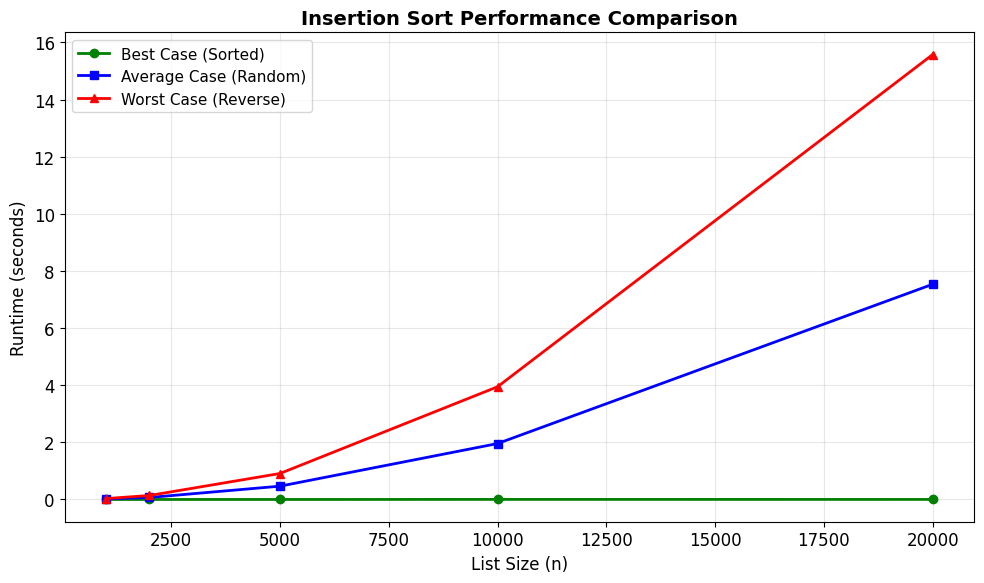

In [16]:
# Plot 1: Insertion Sort Performance Across All Cases
plt.figure(figsize=(10, 6))

# Extract data for insertion sort
sizes = benchmark_results['insertion_sort']['best']['sizes']
best_times = benchmark_results['insertion_sort']['best']['times']
avg_times = benchmark_results['insertion_sort']['average']['times']
worst_times = benchmark_results['insertion_sort']['worst']['times']

# Create the plot
plt.plot(sizes, best_times, 'g-o', label='Best Case (Sorted)', linewidth=2, markersize=6)
plt.plot(sizes, avg_times, 'b-s', label='Average Case (Random)', linewidth=2, markersize=6)
plt.plot(sizes, worst_times, 'r-^', label='Worst Case (Reverse)', linewidth=2, markersize=6)

plt.title('Insertion Sort Performance Comparison', fontsize=14, fontweight='bold')
plt.xlabel('List Size (n)', fontsize=12)
plt.ylabel('Runtime (seconds)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

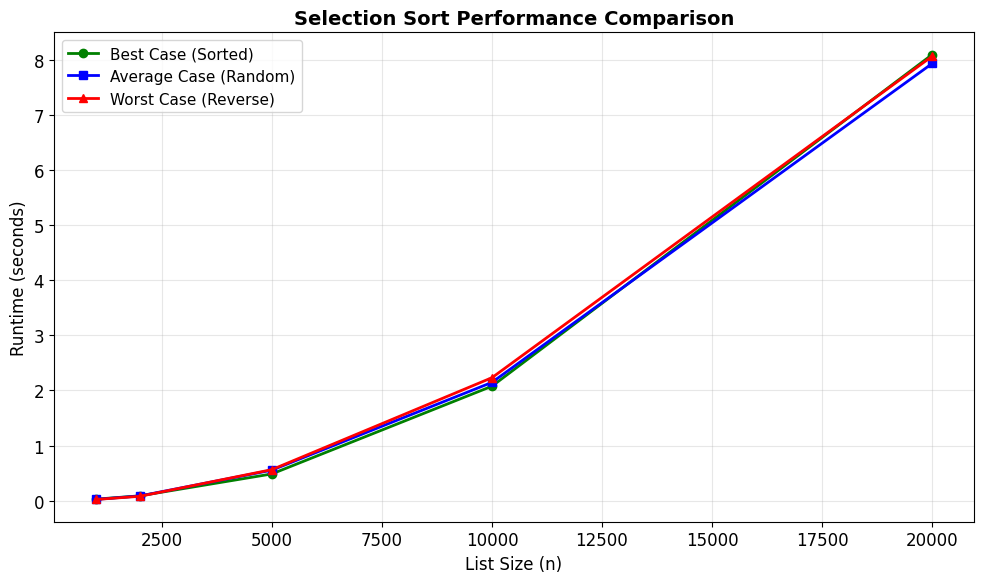

In [17]:
# Plot 2: Selection Sort Performance Across All Cases
plt.figure(figsize=(10, 6))

# Extract data for selection sort
sizes = benchmark_results['selection_sort']['best']['sizes']
best_times = benchmark_results['selection_sort']['best']['times']
avg_times = benchmark_results['selection_sort']['average']['times']
worst_times = benchmark_results['selection_sort']['worst']['times']

# Create the plot
plt.plot(sizes, best_times, 'g-o', label='Best Case (Sorted)', linewidth=2, markersize=6)
plt.plot(sizes, avg_times, 'b-s', label='Average Case (Random)', linewidth=2, markersize=6)
plt.plot(sizes, worst_times, 'r-^', label='Worst Case (Reverse)', linewidth=2, markersize=6)

plt.title('Selection Sort Performance Comparison', fontsize=14, fontweight='bold')
plt.xlabel('List Size (n)', fontsize=12)
plt.ylabel('Runtime (seconds)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Case-Focused Plots

These plots show both algorithms for each case separately, allowing direct comparison between algorithms.

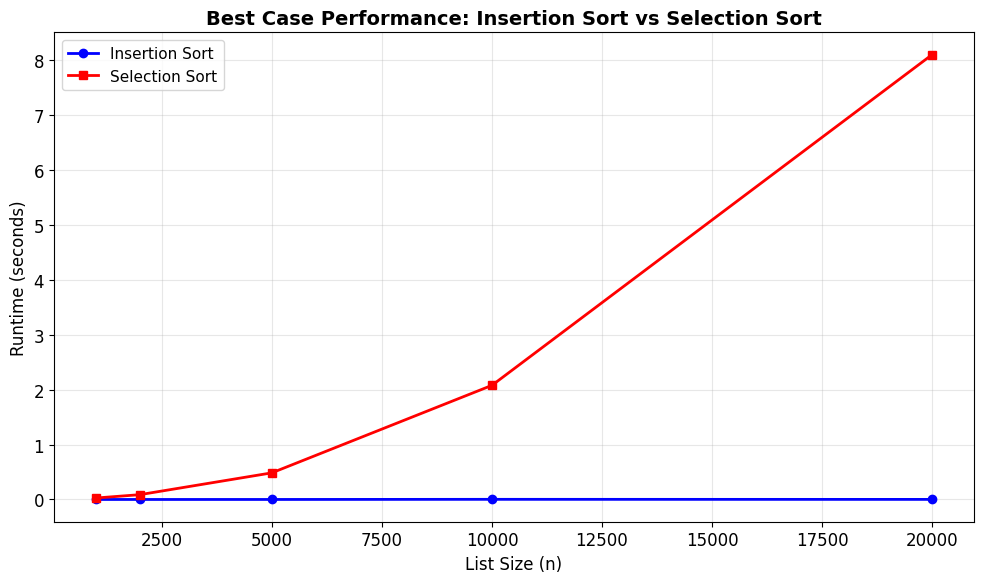

In [18]:
# Plot 3: Best Case Comparison (Both Algorithms)
plt.figure(figsize=(10, 6))

# Extract best case data for both algorithms
sizes = benchmark_results['insertion_sort']['best']['sizes']
insertion_best = benchmark_results['insertion_sort']['best']['times']
selection_best = benchmark_results['selection_sort']['best']['times']

# Create the plot
plt.plot(sizes, insertion_best, 'b-o', label='Insertion Sort', linewidth=2, markersize=6)
plt.plot(sizes, selection_best, 'r-s', label='Selection Sort', linewidth=2, markersize=6)

plt.title('Best Case Performance: Insertion Sort vs Selection Sort', fontsize=14, fontweight='bold')
plt.xlabel('List Size (n)', fontsize=12)
plt.ylabel('Runtime (seconds)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

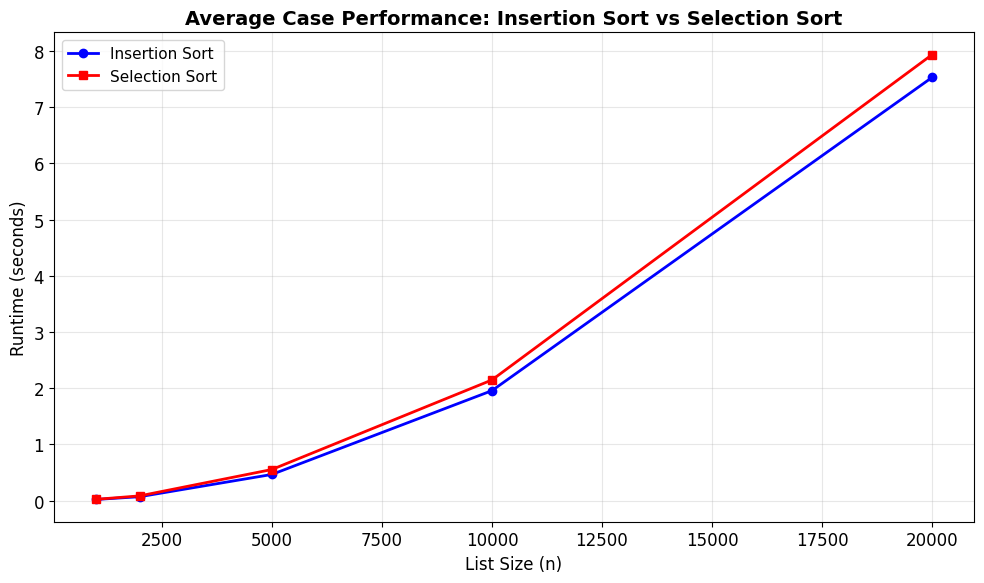

In [19]:
# Plot 4: Average Case Comparison (Both Algorithms)
plt.figure(figsize=(10, 6))

# Extract average case data for both algorithms
sizes = benchmark_results['insertion_sort']['average']['sizes']
insertion_avg = benchmark_results['insertion_sort']['average']['times']
selection_avg = benchmark_results['selection_sort']['average']['times']

# Create the plot
plt.plot(sizes, insertion_avg, 'b-o', label='Insertion Sort', linewidth=2, markersize=6)
plt.plot(sizes, selection_avg, 'r-s', label='Selection Sort', linewidth=2, markersize=6)

plt.title('Average Case Performance: Insertion Sort vs Selection Sort', fontsize=14, fontweight='bold')
plt.xlabel('List Size (n)', fontsize=12)
plt.ylabel('Runtime (seconds)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

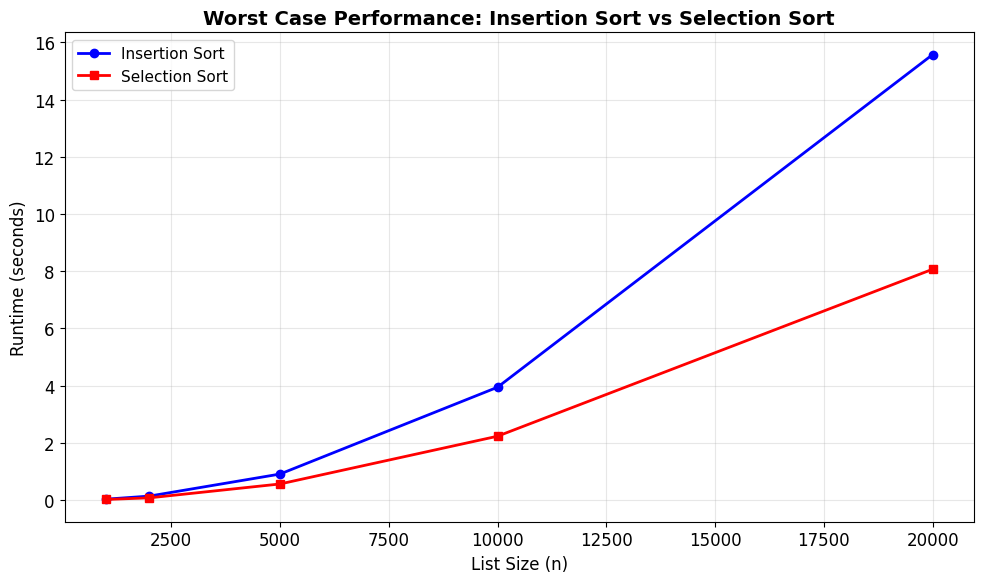

In [20]:
# Plot 5: Worst Case Comparison (Both Algorithms)
plt.figure(figsize=(10, 6))

# Extract worst case data for both algorithms
sizes = benchmark_results['insertion_sort']['worst']['sizes']
insertion_worst = benchmark_results['insertion_sort']['worst']['times']
selection_worst = benchmark_results['selection_sort']['worst']['times']

# Create the plot
plt.plot(sizes, insertion_worst, 'b-o', label='Insertion Sort', linewidth=2, markersize=6)
plt.plot(sizes, selection_worst, 'r-s', label='Selection Sort', linewidth=2, markersize=6)

plt.title('Worst Case Performance: Insertion Sort vs Selection Sort', fontsize=14, fontweight='bold')
plt.xlabel('List Size (n)', fontsize=12)
plt.ylabel('Runtime (seconds)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [21]:
print("=== PERFORMANCE VISUALIZATION SUMMARY ===")
print()
print("Generated 5 performance plots:")
print("1. Insertion Sort Performance (all 3 cases)")
print("2. Selection Sort Performance (all 3 cases)")
print("3. Best Case Comparison (both algorithms)")
print("4. Average Case Comparison (both algorithms)")
print("5. Worst Case Comparison (both algorithms)")
print()
print("Key Observations from Plots:")
print("- Insertion sort shows significant performance variation between cases")
print("- Selection sort shows consistent O(n²) behavior across all cases")
print("- Best case: Insertion sort dramatically outperforms selection sort")
print("- Average/Worst cases: Performance is more comparable between algorithms")
print("- All plots demonstrate clear quadratic growth patterns for most scenarios")

=== PERFORMANCE VISUALIZATION SUMMARY ===

Generated 5 performance plots:
1. Insertion Sort Performance (all 3 cases)
2. Selection Sort Performance (all 3 cases)
3. Best Case Comparison (both algorithms)
4. Average Case Comparison (both algorithms)
5. Worst Case Comparison (both algorithms)

Key Observations from Plots:
- Insertion sort shows significant performance variation between cases
- Selection sort shows consistent O(n²) behavior across all cases
- Best case: Insertion sort dramatically outperforms selection sort
- Average/Worst cases: Performance is more comparable between algorithms
- All plots demonstrate clear quadratic growth patterns for most scenarios


## Analysis and Reflection Questions

### Theoretical vs Estimated Runtime Functions

| Algorithm | Case | Theoretical | Estimated Slope | Match |
|-----------|------|-------------|-----------------|-------|
| Insertion Sort | Best | O(n) | 0.924 | Yes |
| Insertion Sort | Average | O(n²) | 2.020 | Yes |
| Insertion Sort | Worst | O(n²) | 2.010 | Yes |
| Selection Sort | Best | O(n²) | 1.924 | Yes |
| Selection Sort | Average | O(n²) | 1.909 | Yes |
| Selection Sort | Worst | O(n²) | 2.030 | Yes |

The estimates match theory well. All slopes are within 0.5 of expected values, and R² values above 0.9 indicate strong correlation.

### Algorithm Performance Comparison

**Insertion sort had better runtime in the best case.** For sorted data, insertion sort was dramatically faster (up to 5000x) because its inner loop rarely executes when data is already in order. The algorithm can skip most comparisons and shifts, achieving O(n) performance.

In contrast, selection sort always performs the same number of comparisons regardless of input order, maintaining O(n²) behavior even for sorted data.

### Practical Algorithm Choice

**I would use insertion sort in practice** because:
- It adapts to partially sorted data (common in real applications)
- Best case performance is significantly better
- Average case performance is comparable to selection sort
- It's stable (maintains relative order of equal elements)

However, for large datasets, neither algorithm is practical - modern O(n log n) algorithms like quicksort or mergesort should be used instead.